**Note to grader:** Each question is assigned with a score. The final score will be (sum of actual scores)/(sum of maximum scores)*100. The grading rubrics are shown in the TA guidelines.



The goal of this assignment is to run some experiments with scikit-learn on a fairly sizeable and interesting image data set. This is the MNIST data set that consists of lots of images, each having 28x28 pixels. By today's standards, this may seem relatively tiny, but only a few years ago was quite challenging computationally, and it motivated the development of several ML algorithms and models that are now state-of-the-art  solutions for much bigger data sets.

The assignment is experimental. We will try to whether a combination of PCA and kNN can yield any good results for the MNIST data set. Let's see if it can be made to work on this data set.

Note: There are less difficult Python parts in this assignment. You can get things done by just repeating things from the class notebooks. But your participation and interaction via Canvas is always appreciated!

In [ ]:

import numpy as np






In [ ]:
# we load the data set directly from scikit learn
#
# note: this operation may take a few seconds. If for any reason it fails we
# can revert back to loading from local storage.

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split


X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
y = y.astype(int)
X = ((X / 255.) - .5) * 2
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=10000, random_state=123, stratify=y)


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(




**(i)** How many data points are in the training and test sets ? <br>
**(ii)** How many attributes does the data set have ?

Exlain how you found the answer to the first two questions.

[**Hint**: Use the 'shape' method associated with numpy arrays. ]

**(iii)** How many different labels does this data set have. Can you demonsrate how to read that number from the vector of labels *y_train*?  <br>
**(iv)** How does the number of attributes relates to the size of the images? <br>
**(v)** What is the role of line 12 (X = ((X / 255.) - .5) * 2) in the above code?





*(Please insert cells below for your answers. Clearly id the part of the question you answer)*

In [ ]:

print(X_train.shape[0])

print(X_train.shape[1])

print(np.unique(y_train))







60000
784
[0 1 2 3 4 5 6 7 8 9]


In [ ]:

maxScore = maxScore + 50




Because the number of attributes of the MNIST data set may be too big to apply kNN on it (due to the 'curse of dimensionality'), we want to compress the images down to a smaller number of 'fake' attributes.

Use scikit-learn to output a data set *X_train_transformed* and *X_test_transformed*, with $l$ attributes. Here a reasonable choice of $l$ is 10, equal to the number of labels. But you can try slightly smaller or bigger values as well.

Print out the shape of *X_train_transformed* and *X_test_transformed*.


**Hint**: Take a look at [this notebook](https://colab.research.google.com/drive/1DG5PjWejo8F7AhozHxj8329SuMtXZ874?usp=drive_fs), and imitate what we did there. Be careful though, to use only the scikit-learn demonstration, not the exhaustive PCA steps.

**Note**: This computation can take a while. If problems are encountered we can try the same experiment on a downsized data set.

In [ ]:
from sklearn.decomposition import PCA
n_components = 10
pca = PCA(n_components=n_components)
X_train_transformed = pca.fit_transform(X_train)
X_test_transformed = pca.transform(X_test)

print(X_train_transformed.shape)
print(X_test_transformed.shape)

(60000, 10)
(10000, 10)


In [ ]:

maxScore = maxScore + 10






Having calculated the *transformed* MNIST data set we can now apply a kNN approach to the MNIST classification data set. Here are the sets:

(i) Fit a $k$-NN classifier on the transformed data set. Here $k$ is a hyperparameter, and you can experiment with it. Be aware though, that larger $k$ can take more time to fit.

(ii) Apply the classifier on the transformed test set. What is the classification accuracy?

(iii) A theoretical question: if we skipped all the above steps and we just assigned a **random** label to each test point, what would the classification accuracy be on average?  Does your result (ii) beat the random expectation? (conduct 1000 trials to get the average accuracy)

(iv) Experiment with different settings of $k$. Experiment design: calculates accuracy for increasing values of k; stops when k decreases for 5 values of k; report your findings in a separate cell.

[**Hint**: Take a look at this [notebook](https://colab.research.google.com/drive/1Mh6I3bR8pE90kcs28JfKok59NtfV_7ct?usp=drive_fs)]


0.9319
0.1000126


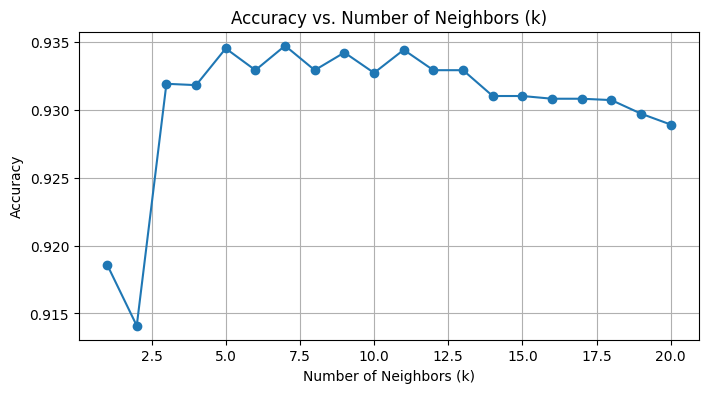

Accuracy for different values of k: [0.9186, 0.9141, 0.9319, 0.9318, 0.9345, 0.9329, 0.9347, 0.9329, 0.9342, 0.9327, 0.9344, 0.9329, 0.9329, 0.931, 0.931, 0.9308, 0.9308, 0.9307, 0.9297, 0.9289]
Best k: 7


In [ ]:


from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
#i
k_value = 3
knn_classifier = KNeighborsClassifier(n_neighbors=k_value)
knn_classifier.fit(X_train_transformed,y_train)



#ii
y_pred = knn_classifier.predict(X_test_transformed)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

#iii
num_trials = 1000
random_accuracy = []

for _ in range(num_trials):
    random_labels = np.random.randint(0, 10, size=len(y_test))
    random_accuracy.append(accuracy_score(y_test, random_labels))


average_random_accuracy = np.mean(random_accuracy)
print(average_random_accuracy)




#iv
k_values = []
accuracy_values = []
consecutive_decreases = 0


for k in range(1, 21):
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train_transformed, y_train)
    y_pred = knn_classifier.predict(X_test_transformed)
    accuracy = accuracy_score(y_test, y_pred)
    k_values.append(k)
    accuracy_values.append(accuracy)

    if len(accuracy_values) >= 2 and accuracy < accuracy_values[-2]:
        consecutive_decreases += 1
    else:
        consecutive_decreases = 0
    if consecutive_decreases >= 5:
        break


plt.figure(figsize=(8, 4))
plt.plot(k_values, accuracy_values, marker='o', linestyle='-')
plt.title('Accuracy vs. Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


print("Accuracy for different values of k:", accuracy_values)
print("Best k:", k_values[np.argmax(accuracy_values)])




In [ ]:

maxScore = maxScore + 40



In [ ]:


score = actualScore*100/maxScore